# Data Understanding & preparation

### Data semantics

To understand first each variable, let's review some audio concepts:

Modality: media file types (full-AV, video-only, audio-only)

vocal_channel (speech, song)

emotion (neutral, calm, happy, sad, angry, fearful, disgust, surprised)

emotional_intensity (normal, strong). NOTE: There is no strong intensity for the 'neutral' emotion

statement ("Kids are talking by the door", "Dogs are sitting by the door")

repetition (1st repetition, 2nd repetition)

actor (01 to 24)

sex (M, F)

An **audio channel** is the path via a signal or data is delivered, i.e, it's where a sound signal is conveyed from the player source to the speaker. For one channel we talk about **mono**, and several channels we refer to **stereo**.  For instance, in stereo sound, there are two audio sources: one speaker on the left, and one on the right. Each of these is represented by one channel.

A **sample** of an audio is a portion of an audio's wave in certain (small) interval. Sometimes we also refer to an audio file as a sample. 

The sample size or **Sample Width** is the size of an individual sample measured that indicates how many bits of information a sample contains. (This is one important factor in the quality/resolution of the audio). 1 means 8-bit, 2 means 16-bit

An **audio frame** is a data record that contains the samples of all the channels available in an audio signal to the same point in time.

frame_rate: number of frames per second expressed in Hertz.

frame_width: Number of bytes for each frame. One frame contains a sample for each channel. It can be computed as channels * sample_width.

length_ms: audio file length in milliseconds.

frame_count: number of frames of the sample. Equivalently, frame_rate * length_ms(converted to secoonds).

intensity: loudness in dBFS

The **zero-crossing rate** is the rate at which a signal changes from positive to zero or negative, and from negative to zero or positive. It's a measure of the smoothness of the signal. So the zero_crossing_sum is computed as zero_crossing rate * length (in seconds).

The original audio signal is represented as a wave function (amplitud as a function of time), therefore it can be computed the mean, standard deviation, minimum and maximum value, kurtosis and skewness of the function.

**Mel-Frequency Cepstral Coefficients** is a set of features (usually about 10-20) which concisely describe the overall shape of a spectral envelope. From this set we can obtain the mean and standard deviation of the values, minimum and maximum value and kurtosis and skewness.

**Spectral Centroid** indicates where the center of mass of the spectrum is located, and it is a good predictor of the 'brigthness' of a sound. Also can be seen as the amplitude-weighted mean of several frequency components. The spectral centroid is computed for every frame of the sample, so each audio sample has a set of values of spectral centroids. As for MFCC, the mean, std, min, max, kur and skew can be computed.

**stft chromagram:** The Chroma value of an audio represent the intensity of the twelve distinctive pitch classes that are used to study music. (stft:short-time Fourier Transform).



Measures to understand the shape of the data:
**Skewness** (skew) measures the symmetry of the distribution

**Kurtosis** (kur) measures the heaviness of the distribution tails, i.e., provides an indication of the presence of outliers.

The **sample rate** is the number of samples taken per second. This is a frequency and it is measured in kilohertz (kHz). Remember that the more often you take samples of the original audio, the closer to the original you can get.

### Classification of the variables
* **Nominal/Categorical:** actor, sex, modality, statement, repetition, vocal channel, emotion. These variables are discrete.
* **Ordinal:** emotional intensity.
* **Numeric:** .
* **Ratio-Scaled:** lenght_ms; sample_width; zero_crossing_sum; frame_rate, frame_width; stft_mean, stft_std, stft_min, stft_max, stft_kur, stft_skew; sc_mean, sc_std, sc_min, sc_max, sc_kur, sc_skew;  mfcc_mean, mfcc_std, mfcc_min, mfcc_max, mfcc_kur, mfcc_skew; std, min, max, kur, skew. All these variables are continuous.


### Distribution of the variables, statistics and assessing data quality

Possible tuples of features we can analyze:

* sex with  emotional intensity (EI)
* EI with statement (stat), SW (sample width), length, intensity (I), Zero-crossing sum (ZC)
* Frame rate - ZC
* SW - Frame Width


**Distributions in Claudio's notebook**:
* emotion x sex (s/c)
* emotion x intensity (box plot)
* emotion (pie chart - histo)
* audio length (hist)
* vocal channel x sex (stacked chart)

**Tasks for next meeting**
1. To understand the meaning of each variable
2. To think about the characteristics of each variable
3. If you have time, to think about the statistical analysis we can associate to pairs of variables.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("ProjectData/ravdess_features.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   modality             2452 non-null   object 
 1   vocal_channel        2256 non-null   object 
 2   emotion              2452 non-null   object 
 3   emotional_intensity  2452 non-null   object 
 4   statement            2452 non-null   object 
 5   repetition           2452 non-null   object 
 6   actor                1326 non-null   float64
 7   sex                  2452 non-null   object 
 8   channels             2452 non-null   int64  
 9   sample_width         2452 non-null   int64  
 10  frame_rate           2452 non-null   int64  
 11  frame_width          2452 non-null   int64  
 12  length_ms            2452 non-null   int64  
 13  frame_count          2452 non-null   float64
 14  intensity            1636 non-null   float64
 15  zero_crossings_sum   2452 non-null   i

<function matplotlib.pyplot.show(close=None, block=None)>

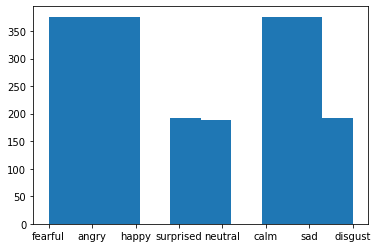

In [5]:
plt.hist(df.emotion)
plt.show

<AxesSubplot:xlabel='emotion'>

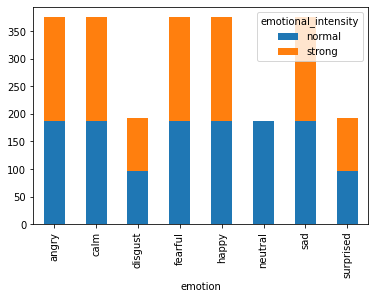

In [13]:
em_intensity_em = pd.crosstab(df["emotion"],df["emotional_intensity"])
em_intensity_em.plot(kind="bar", stacked = True)

In [18]:
df['statement'] = df['statement'].replace(['Dogs are sitting by the door'], '0')
df['statement'] = df['statement'].replace(['Kids are talking by the door'], '1')

<AxesSubplot:xlabel='emotion'>

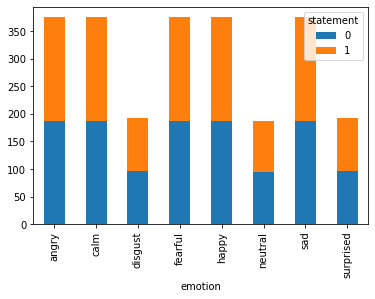

In [24]:
em_stat = pd.crosstab(df.emotion,df.statement)
em_stat.plot(kind = 'bar', stacked = True)

<AxesSubplot:xlabel='emotion'>

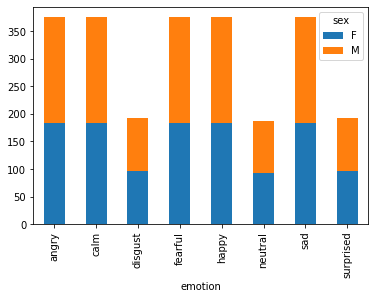

In [25]:
em_sex = pd.crosstab(df.emotion,df.sex)
em_sex.plot(kind="bar",stacked = True)

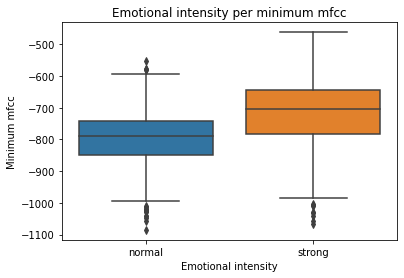

In [26]:
sns.boxplot(x = "emotional_intensity", y = "mfcc_min", data = df)
plt.title("Emotional intensity per minimum mfcc")
plt.xlabel("Emotional intensity")
plt.ylabel("Minimum mfcc")
#plt.savefig("boxplot_EI-length.png")
plt.show()

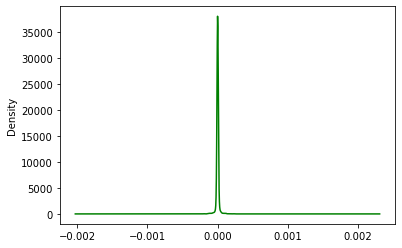

In [30]:
density = df["mean"].plot.density(color='green')

<AxesSubplot:ylabel='Density'>

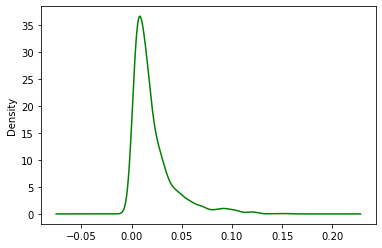

In [32]:
df["std"].plot.kde(color='green')

<AxesSubplot:ylabel='Density'>

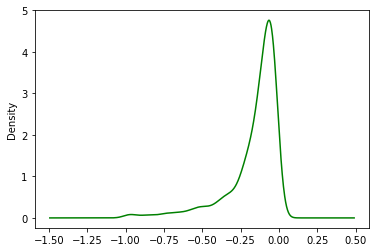

In [33]:
df["min"].plot.kde(color='green')

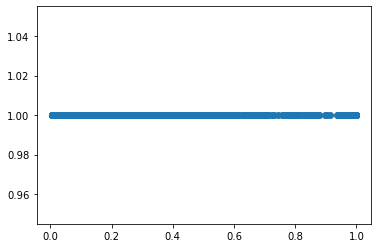

In [18]:
plt.scatter(df["max"],df["stft_max"])
plt.show()

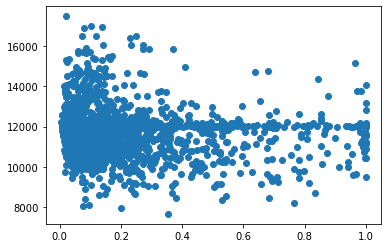

In [19]:
plt.scatter(df["max"],df["sc_max"])
plt.show()

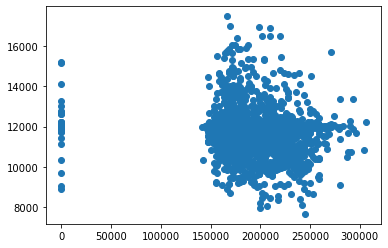

In [20]:
plt.scatter(df["frame_count"],df["sc_max"])
plt.show()

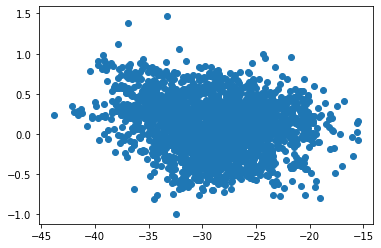

In [28]:
plt.scatter(df["mfcc_mean"],df["stft_skew"])
plt.show()

C:\Users\usuario\AppData\Local\Temp\ipykernel_4944\3208098464.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


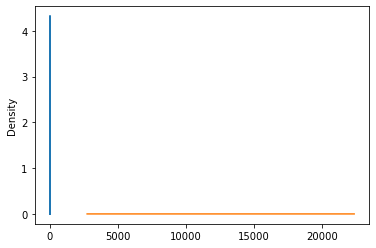

In [14]:
max_features = df[["max","sc_max"]]
fig, ax = plt.subplots(1,1)
for s in max_features.columns:
    df[s].plot(kind='density')
fig.show()

<AxesSubplot:ylabel='Density'>

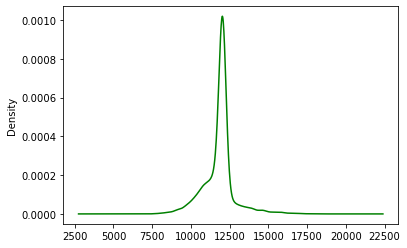

In [15]:
df["sc_max"].plot.kde(color='green')

<AxesSubplot:ylabel='Density'>

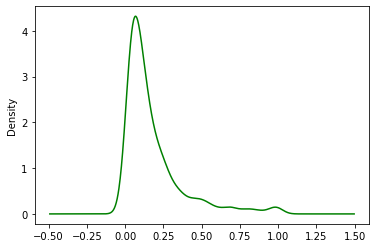

In [16]:
df["max"].plot.kde(color='green')

<AxesSubplot:ylabel='Density'>

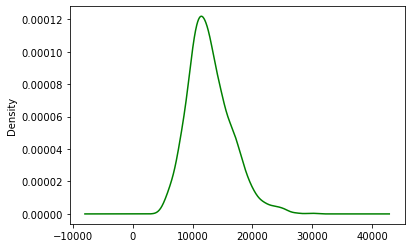

In [38]:
df["zero_crossings_sum"].plot.kde(color='green')

<AxesSubplot:ylabel='Density'>

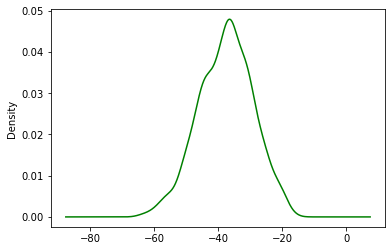

In [39]:
df["intensity"].plot.kde(color='green')

<AxesSubplot:ylabel='Density'>

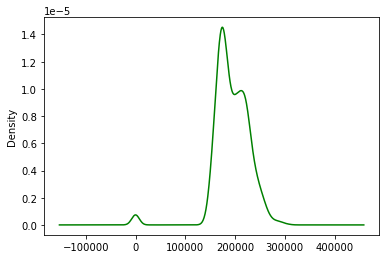

In [40]:
df["frame_count"].plot.kde(color='green')

C:\Users\usuario\AppData\Local\Temp\ipykernel_8988\2196359511.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


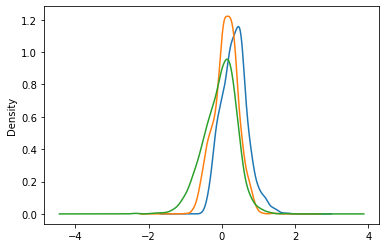

In [41]:
skew_features = df[["sc_skew","stft_skew","skew"]]
fig, ax = plt.subplots(1,1)
for s in skew_features.columns:
    df[s].plot(kind='density')
fig.show()

C:\Users\usuario\AppData\Local\Temp\ipykernel_4944\2833179634.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


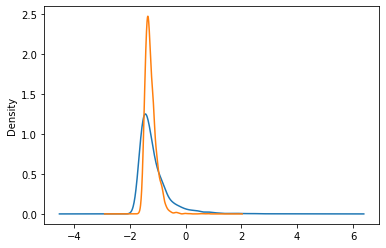

In [17]:
kur_features = df[["sc_kur","stft_kur"]]
fig, ax = plt.subplots(1,1)
for s in kur_features.columns:
    df[s].plot(kind='density')
fig.show()

<AxesSubplot:ylabel='Density'>

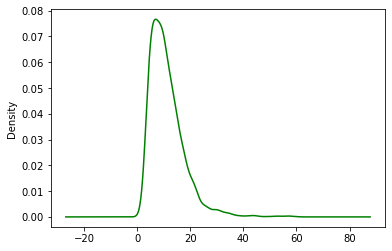

In [35]:
df["kur"].plot.kde(color='green')

Frame count: interpolation

Missing values: 
Vocal channel...
